# 1. Intro

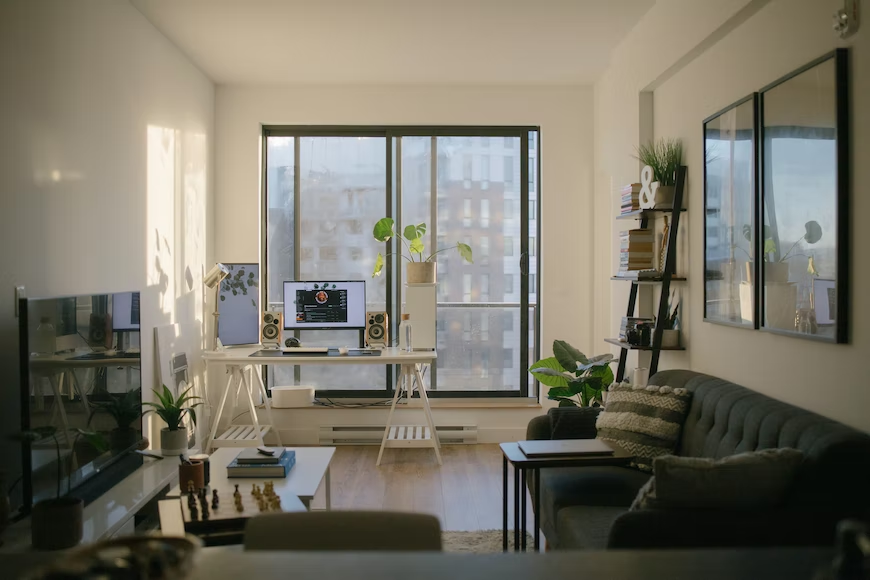

안녕하세요😁😁😁 데이크루 4기 한남더힐의 내집마련을 위한 **3번째** 과정, 함께 시작해볼까요??



이쯤에서 ❗❗❗ 다시 한번 우리의 목표를 되짚어 보겠습니다. 

우리의 목표는 <font color=purple>아파트 실거래가를 예측</font>하는 것입니다. 이를 위해 우리는 머신러닝이라는 기법을 사용할 텐데요.



- <font color=red>**머신러닝**</font>이란??

 판단이나 예측을 위해서 데이터를 분석하고 데이터 분석결과를 학습하는 모델을 만드는 과정을 의미합니다. 우리는 이렇게 잘 만들어진 모델을 통해 아파트 실거래가를 예측하게 됩니다.

지금까지 머신러닝의 여정에서 데이터를 처음 가져왔을 때부터 기본적인 데이터 분석까지에 대해서 배워봤는데요,



Stage 1: 데이터를 불러오고 기초적으로 이해해보기

Stage 2: 다양한 시각화 방법을 이용한 데이터 분석하기





기억나시나요??

Stage 3 에서는 어떻게 하면 **<font color=green>모델이 데이터를 잘 이해할 수 있게 할지</font>** 고민해보는 시간을 가져볼게요 😘

이 과정을 <font color=red>데이터 전처리</font>라고 부른답니다

---

# 2. 데이터 전처리의 필요성

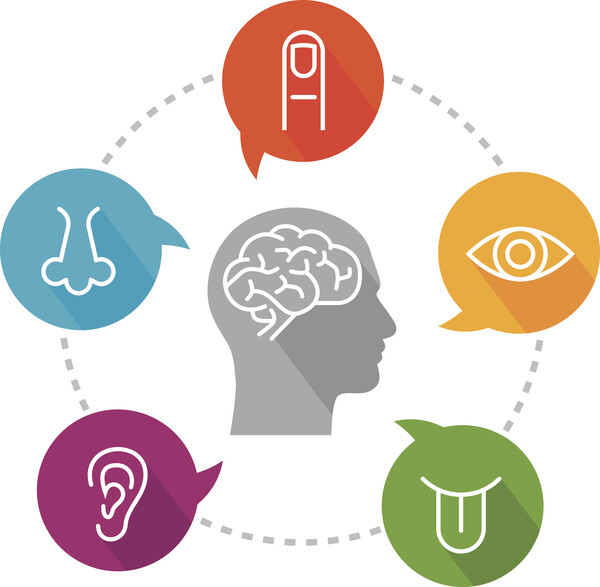

> 출처 : http://weekly.hankooki.com/news/articleView.html?idxno=7074938

머신러닝의 최종 목표는 인간의 뇌처럼 사고, 판단, 반응하는 것, 나아가서 인간의 뇌를 넘어서는 머신을 구축하는 것입니다.

우리 뇌의 작동 방식을 살펴봅시다. 🧠

시각, 촉각, 후각, 청각, 미각 등 다양한 형태의 자극으로 입력이 들어오고, 입력에 맞는 생체 시스템을 통해서 뇌로 전달, 사고, 판단, 출력이 이루어집니다.

여기서 **다양한 입력에 맞는 생체 시스템을 기계로 구현**해서 모델에 전달하는 과정이 <font color=red>**데이터 전처리**</font>입니다.

지금 분석하는 데이터는 결측값도 없고 분석하기 좋은 표 형태로 주어지지만 현실 데이터는 전혀 그렇지 않답니다 😥


그렇다 보니, 데이터 전처리는 데이터 분석 과정에서 가장 시간을 많이 차지하지만 그만큼 중요한 파트랍니다.


그럼 데이터 전처리를 본격적으로 시작해볼까요?

---

# 3. 데이터 전처리


## 3.1 데이터 불러오기

패키지와 데이터를 불러오는 건 이제 누워서 떡 먹기죠? 😀😀

아래 코드셀을 실행해봅시다!

In [ ]:
# 주피터라이트에서 seaborn 사용하기
import micropip
await micropip.install('seaborn')

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# train 데이터를 불러옵니다.
train = pd.read_csv('./train.csv')

---

## 3.2 파생변수 생성

Stage 2의 EDA를 통해서 얻은 데이터의 전체 정보를 기반으로 

변수 하나씩 더 자세히 살펴보면서 <font color=blue>유의미한 변수를 추가</font>해보는 시간을 가져볼게요!

---

### 평단가

- 전용면적

먼저, 전용면적('**exclusive_use_area**') 변수를 살펴보면서 **<font color=purple>평단가</font>** 변수를 생각해볼까요?



같은 조건의 집이라면, 큰 집과 작은 집 중에 어느 쪽이 더 비쌀까요?



👦(데이커 여러분) : 큰 집이 비싸요 !!

👨‍🏫(한남더힐 팀원들) : 맞습니다 🙆‍♀️🙆‍♂️🙆



대부분의 경우, 거래가는 상식과 같이 <font color=green>면적에 비례</font>합니다.

우리가 stage2에서 배운 <font color=red>lmplot</font>을 통해서 한번 더 확인해봅시다.

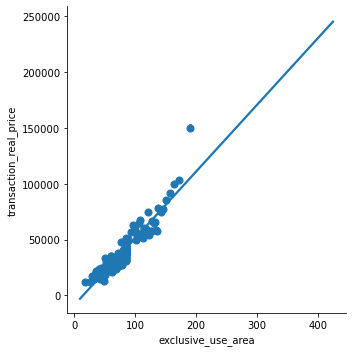

In [2]:
sns.lmplot(data=train, x='exclusive_use_area', y='transaction_real_price', x_bins = 200)

역시, 우리의 예상이 맞았네요!



그런데 여기서 문제가 하나 생겼어요 😨😨😨

같은 거래가를 기록한 두 아파트가 같은 선상에 있다고 평가할 수 있을까요?



예를 한 번 들어봅시다.

In [3]:
train.iloc[[5732,566959],:]

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
5732,5732,4927,서울특별시,신당동,407-17,벨레어카운티,신당동 407-17 벨레어카운티,273.820,2004,200904,21~30,5,95000
566959,566959,10308,서울특별시,청담동,134-38,청담자이,청담동 134-38 청담자이,49.619,2012,201609,1~10,6,95000


위와 같이 벨레어카운티와 청담자이는 모두 9억 5천만원의 실거래가를 기록했습니다.



실거래가가 같다는 이유만으로, 두 아파트가 같은 선상에서 비교될 수 있을까요? <br>
**그럴 수는 없겠죠 😯**


왜냐하면 **벨레어카운티**는 **83평**, **청담자이**는 **15평**의 전용면적을 갖고 있기 때문입니다.



 이와 같이 면적과 실거래가의 관계가 분명하기 때문에, <br>
 다음과 같이 '**평당(3.3 제곱미터 당) 실거래가**'를 의미하는 <font color=green>**price_per_area**</font> 변수를 추가한 후 데이터를 분석해보도록 합시다!

In [4]:
# 평당 아파트 실거래가 파생변수를 생성합니다.
train['price_per_area'] = train['transaction_real_price'] / train['exclusive_use_area']*3.3

---

### 아파트 연식

- 설립연도





여러분들은 오래된 아파트와 새로 지은 아파트 중 어느 곳에 살고 싶으신가요?

꼭 하나를 선택해야 한다면, 아마 대부분의 사람들은 새로 지은 아파트에 살고 싶어할 것 같아요 🙂

그렇다면, 새로 지은 아파트일수록 더 비쌀까요? 😮

**<font color=purple>year_of_completion</font>** 변수와 <font color=purple>**price_per_area**</font> 변수를 이용해서 <font color=red>**lmplot**</font>을 그려서 확인해봅시다.

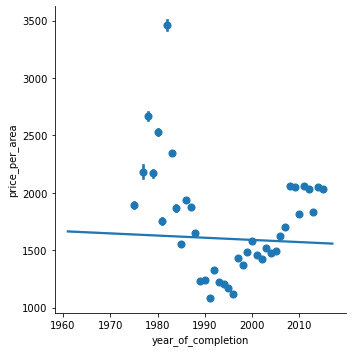

In [5]:
sns.lmplot(data=train, x='year_of_completion',y='price_per_area',x_bins=150)

분석 결과가 생각했던 것과 다르네요.



**1990년 이후에 설립된 아파트는 대표값이 추세적으로 증가**하는 것으로 보입니다.

그런데 **1990년 이전에 설립된 아파트의 평단가 대표값이 오히려 더 큰 것**으로 보이네요.



그렇기 때문에 추세선이 위 그래프의 직선과 같이 나오게 되었군요.

흠.... 🤔 무언가 잘못된 것 같습니다.



1990년도 이후 설립된 아파트의 실거래가가 높은 이유가 무엇일까요? 우리는 다음과 같은 이유를 추측해볼 수 있어요.

- 30년 이상 된 **재건축** 대상 아파트의 높은 실거래가

- **거래시점을 기준**으로 아파트 연식 측정

추측이 사실인지 확인해봐야겠죠? 우리 이렇게 해보는 건 어떨까요? 😃


**거래시점 아파트 연식**과 **평단가**의 관계를 분석하기 위해서 거래연도와 설립연도를 이용해서 **<font color=green>아파트 연식</font>** 변수를 해봅시다. 🏢



stage 2에서 생성한 거래연도('year')와 설립연도('year_of_completion') 컬럼을 활용하면 되겠지요?



두 변수 모두 int64 형식으로 저장되어 있으니, 덧셈, 뺄셈 등 연산에는 문제가 없을 거에요 😉

stage 2에서 그랬듯이, 거래연도('year') 컬럼을 만들면서 월('month') 컬럼도 함께 생성해주고, 거래일자('transaction_date')도 처리해볼게요 🙂

거래시점의 아파트 연식을 <font color=purple>**age**</font>라는 이름의 변수로 저장해봅시다 !

In [6]:
# 아파트 연식 변수를 생성합니다.

train['year'] = train['transaction_year_month'].astype(str).str[:4].astype(int)
train['month'] = train['transaction_year_month'].astype(str).str[4:].astype(int)

train['age'] = train['year'] - train['year_of_completion']

train.loc[(train['transaction_date'] == '21~30') | (train['transaction_date'] == '21~28') | (train['transaction_date'] == '21~29'), 'transaction_date'] = '21~31'

아파트 연식 변수를 생성했다면,

**age**변수와 **price_per_area**변수를 이용해서 아파트 연식과 평단가의 관계를 분석해봅시다.

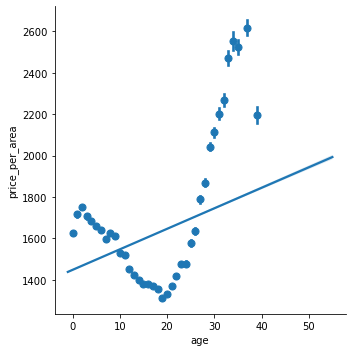

In [7]:
sns.lmplot(data=train, x='age', y='price_per_area', x_bins = 150)

어머나 🤷‍♀️🤷‍♂️🤷 예상 밖의 결과인데요?!



거래시점에서 **20년 안에 지어진 아파트**는 **오래될수록 낮은 평단가**를 형성하는 경향을 보이네요.

반대로 거래시점에서 **20년보다 더 오래된 아파트**는 **오래될수록 높은 평단가**를 형성하는 경향을 보입니다.



아파트 연식이 <font color=red>**20년이 넘은 재건축 대상 아파트가 원인**</font>이라는 가설에 근거를 더하는 결과입니다.

그렇다면 이제 평단가가 아닌 아파트 실거래가와 설립연도의 관계를 분석해봅시다.

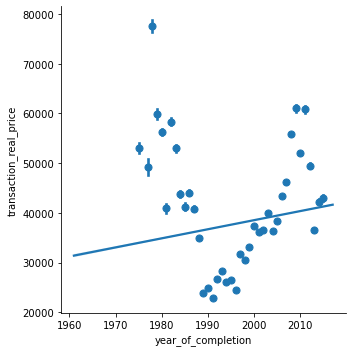

In [8]:
sns.lmplot(data=train, x='year_of_completion',y='transaction_real_price', x_bins=150)

1990년 이전 건축한 아파트의 대표값이 높은 거래가를 보이는 동일한 양상을 보입니다.



다만, 면적을 고려하니 추세선은 신축 아파트가 더 높은 거래가를 형성하는 것으로 바뀌었네요.



이를 통해서 '**근래로 올수록 아파트를 더 넓게 지었다.**'라는 가설을 세워보고, 

**year_of_completion**과 **exclusive_use_area**를 이용해서 검증해봅시다.

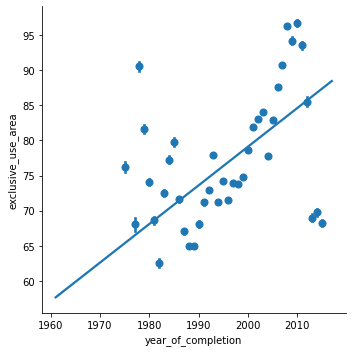

In [9]:
sns.lmplot(data=train, x='year_of_completion', y='exclusive_use_area', x_bins=150)

lmplot를 보니, <font color=red>**신축 아파트일수록 전용면적이 큰 경향**</font>을 확인할 수 있네요!

---

### 재건축여부

위에서 age 변수의 그래프를 통해 20년 보다 더 오래된 아파트가 평단가가 높은 경향을 보인다는 결과를 확인했습니다.<br> 


이를 통해 20년 넘은 아파트를 재건축 대상이라고 가정한 다음, 재건축 대상인 경우 1, 재건축 대상이 아닌 경우 0인 범주형 변수를 만들어 보겠습니다.

이를 위해 다시 한번 loc를 이용해볼게요 😀 <br>
지금까지 loc를 많이 사용했기 때문에, 이번에도 다들 잘 하실 수 있겠죠? 🔥

In [10]:
train.loc[train['age'] < 20, 'reconstruction'] = 'NO'
train.loc[train['age'] >= 20, 'reconstruction'] = 'YES'

<font color=green>countplot</font>을 통해 재건축 여부를 나타내는 reconstruction 변수가 잘 생성되었는지 확인해보겠습니다 😄



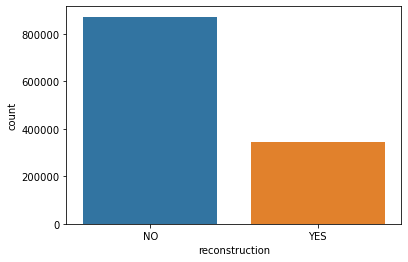

In [11]:
sns.countplot(x = 'reconstruction', data = train)
plt.show()

굿! 잘 생성되었네요 👍

---

### 아파트 브랜드

- 아파트명


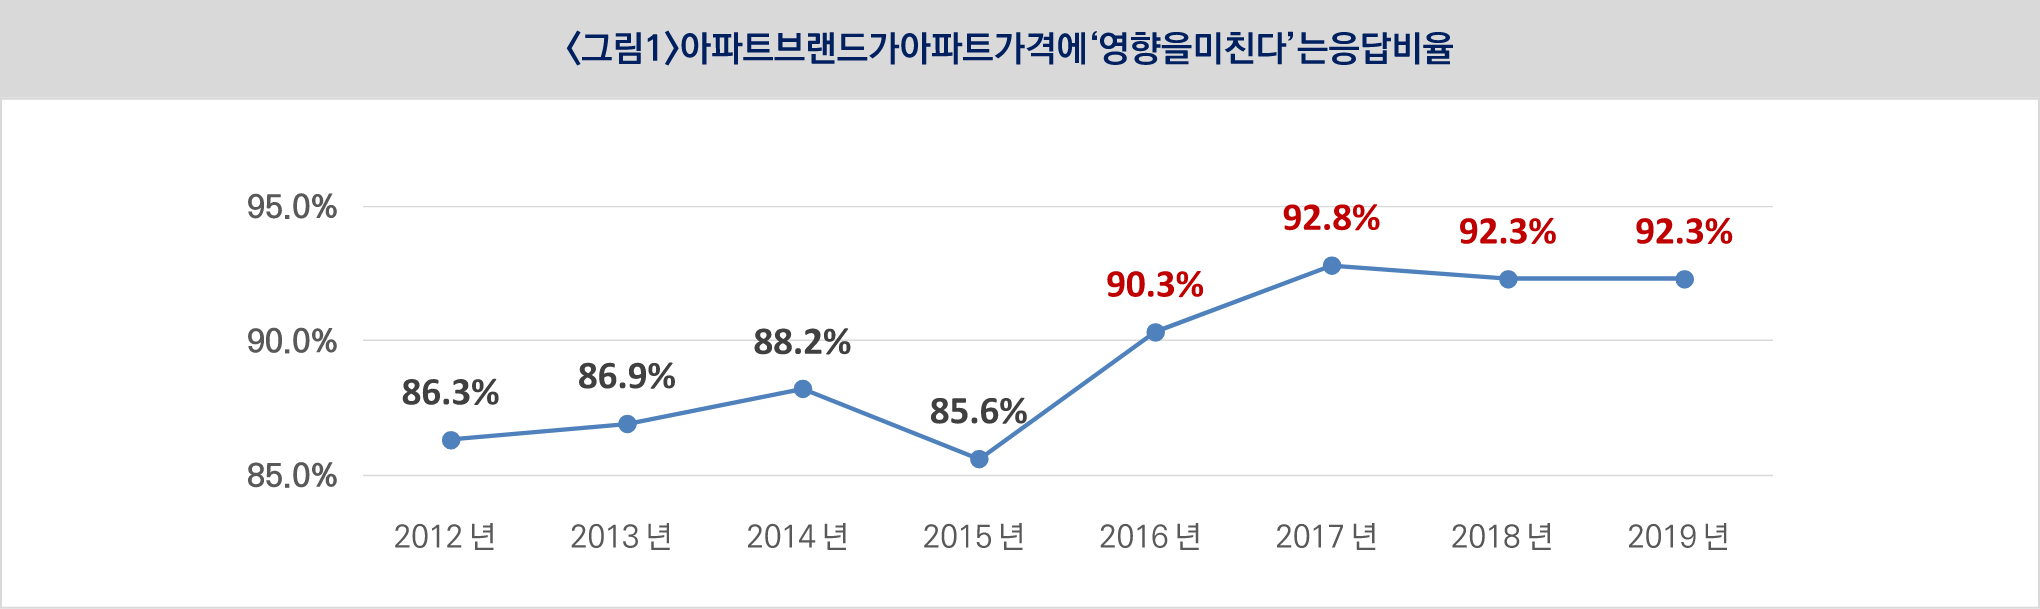

`'부동산 114'의 아파트 브랜드 인지도 및 선호도 조사` 결과,

아파트 브랜드가 아파트 가격에 영향을 미친다고 생각하는 응답비율이 90%가 넘으며, 매년 상승하는 추세를 보입니다.

아파트 브랜드를 유의미하게 처리하기 위해 먼저 <font color=red>데이터프레임.unique()</font>를 이용해서 **apt** 변수를 살펴봅시다.

In [12]:
train['apt'].unique()

array(['신현(101동)', '사직파크맨션', '두레엘리시안', ..., '삼협 아띠랑스', '(94-8)',
       '동부산관광단지 삼정그린코아 더베스트'], dtype=object)

흠... 신현(101동), (94-8)과 같은 값을 포함해서 아파트 브랜드를 구분한다면, 범주가 굉장히 많아질 것 같은데요... 😨😨😨

이걸 어떻게 처리하면 좋을까요?

---

#### 1. 먼저, 아파트명에 존재하는 괄호와 괄호 안 내용을 제거해서 분류 범주의 개수를 줄여보겠습니다.


- `re`(Regular Expressions) module

위 모듈은 복잡한 문자열을 처리할 때 사용하는 기법이에요.






특정 패턴을 가지는 문자열을 검색하거나, 특정 패턴을 가지는 문자열만 뽑아내거나, <br>
특정 패턴을 가지는 문자열을 다른 것으로 바꾸거나 할 수 있답니다.


그럼 괄호를 포함하는 문자열을 찾아서 공백으로 바꿔주면 문제가 해결되겠죠??

re module 안에 sub 메소드를 다음과 같이 사용하면 됩니다 😀

* **<font color=orange>re.sub(pattern, new_text, text)</font>**



<font color=blue>**text**에서 **pattern**에 해당하는 부분을 **new_text**로 바꾼다</font> 는 방식으로 사용하면 됩니다.

그렇다면, 괄호와 괄호 안의 문자열은 pattern으로 어떻게 나타낼까요?? <br>
다음과 같은 표현식을 사용하면 된답니다 





*   ** \ **: 프로그래밍 언어로 표현하기에 제한이 있는 문자나 기능을 표현합니다.
> 그렇기 때문에 '\\('가 괄호를 표현하는 것 입니다.
*  **.**: 모든 문자를 표현합니다.
*  *: 0개 이상의 반복을 표현합니다.




표현식에 따르면, 아래와 같이 pattern를 설정할 수 있겠죠??

앗, 그런데 잠시만요 ❗❗️ 여기서 꿀팁 들어갑니다 🍯🍯 <br>
아래 코드는 코드 진행률과 시간을 볼 수 있게 해주는 라이브러리랍니다 😆 <br>
`from tqdm import tqdm` <br>
`import time`

In [13]:
# re 모듈을 선언하고 괄호와 괄호 안 문자를 찾아서 삭제합니다.
from tqdm import tqdm
import time
import re

regex = "\(.*\)"

for i in tqdm(range(len(train))):
   train.at[i, 'apt'] = re.sub(regex, '', train.at[i, 'apt']) 

100%|█████████████████████████████████████████████████████████████████████| 1216553/1216553 [00:28<00:00, 42831.35it/s]


정규 표현식 처리를 한 후, <br>
아파트명을 다시 한번 확인해보면 괄호와 괄호 안의 문자가 삭제된 것을 알 수 있습니다.

In [14]:
train['apt'].unique()

array(['신현', '사직파크맨션', '두레엘리시안', ..., '모드니 하이츠', '삼협 아띠랑스',
       '동부산관광단지 삼정그린코아 더베스트'], dtype=object)

---

#### 2. 그렇다면, 이제 가치를 부여할 아파트 브랜드를 찾아볼까요?



아파트 브랜드에는 어떤 것이 있는지 알아보기 위해, 

일단 데이터에서 가장 많이 겹치는 아파트 이름 20개만 뽑아볼게요!

In [15]:
train['apt'].value_counts()[:20]

현대        17716
한신        10135
삼성         6771
대우         6390
신동아        6386
두산         5801
우성         5781
주공2        5669
삼성래미안      5483
벽산         4651
대림         4582
동원로얄듀크     4430
경남         4030
삼환         3896
극동         3771
삼익         3583
롯데캐슬       3570
쌍용         3409
코오롱        3320
한양         3231
Name: apt, dtype: int64

'현대'이라는 이름을 가진 아파트의 거래내역이 가장 많이 존재하는군요!

그런데 여기서 의문이 듭니다 🤔🤔🤔

**'삼성'아파트**와 **이름에 '삼성'을 포함**한 '리버힐삼성', '강변삼성스위트', '삼성로얄', '삼성쉐르빌' 등을 다르게 취급하는 것이 맞을까요?

만약 그렇다면, 분류 범주가 늘어나고 아파트 브랜드의 가치를 유의미하게 반영하지 못할 것입니다.😖

그럼, 우리는 상위 20개 아파트 이름을 포함하는 아파트 이름에 대해 같은 범주로 묶어주고 싶은데요.





상위 20개 아파트 이름을 리스트로 만들고,

apt가 해당 리스트의 아파트 이름을 포함한다면 리스트 안의 대표 이름으로 바꿔줍시다!

그리고, **리스트 안에 포함되지 않는 아파트** 이름은 범주를 축소하기 위해서 **하나로 통일**하겠습니다.

In [16]:
# 상위 20개 아파트 이름 리스트를 생성합니다.
apt_brand_list = train['apt'].value_counts()[:20].index

# 상위 20개 아파트 이름에 속하는지를 구별하는 변수를 생성합니다.
train['branded'] = False

# 아파트 이름이 리스트 안의 브랜드를 가지고 있다면 대표 이름으로 바꿔고 branded 변수를 True로 바꿉니다.
for brand in tqdm(apt_brand_list):
  train['apt'].loc[train['apt'].str.contains(brand)] = brand
  train['branded'].loc[train['apt'].str.contains(brand)] = True

# branded 변수가 False인 아파트를 others라는 이름으로 통합합니다.
train['apt'].loc[~train['branded']] = 'others'

  0%|                                                                                           | 0/20 [00:00<?, ?it/s]C:\Users\USER\AppData\Local\Temp\ipykernel_2000\2881525954.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['apt'].loc[train['apt'].str.contains(brand)] = brand
C:\Users\USER\AppData\Local\Temp\ipykernel_2000\2881525954.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['branded'].loc[train['apt'].str.contains(brand)] = True
100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:31<00:00,  1.57s/it]
C:\Users\USER\AppData\Local\Temp\ipykernel_

잘 처리됐는지 한번 확인해봅시다!

In [17]:
train['apt'].value_counts()

others    822637
현대         84894
삼성         32828
한신         27481
벽산         26968
우성         24524
롯데캐슬       24495
대림         24063
두산         19501
대우         19035
삼익         18708
쌍용         16612
신동아        14049
경남         10800
극동          9925
주공2         9912
한양          9376
코오롱         8602
삼환          6073
동원로얄듀크      6070
Name: apt, dtype: int64

---

#### 3. 범주에 숫자를 부여하는 라벨 인코딩을 해봅시다.

지금까지, 20개로 아파트명을 범주화했습니다.

우리가 정한 범주를 컴퓨터에 이해시키기 위해서는 숫자로 <font color=green>라벨 인코딩</font>이 필요하답니다.
> 라벨 인코딩 : 범주 to 숫자



각 범주에 숫자를 부여할 때, <font color=blue>순서</font>가 중요하게 작용할 수 있습니다.



아파트 실거래가를 예측하는 것이 목적이니, 

아파트명을 평단가를 기준으로 오름차순 정렬한 다음 그 순서로 **0부터 19까지 숫자를 부여**해줍시다! 

In [18]:
# 평단가 평균을 기준으로 아파트명을 오름차순 정렬해줍니다. 
apt_price = train.groupby('apt')['price_per_area'].mean().sort_values(ascending=True)

# 평단가 평균이 낮은 순으로 아파트명에 0부터 19까지 부여해줍니다.
for i, apt in enumerate(tqdm(apt_price.index)):
    train['apt'].loc[train['apt'] == apt] = i

  0%|                                                                                           | 0/20 [00:00<?, ?it/s]C:\Users\USER\AppData\Local\Temp\ipykernel_2000\689223827.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['apt'].loc[train['apt'] == apt] = i
100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:02<00:00,  7.23it/s]


In [19]:
# 라벨 인코딩 결과를 확인합니다.

apt_price_le = train.groupby('apt')['price_per_area'].mean().sort_values(ascending=True)
print('변환전\n', apt_price)
print('변환후\n', apt_price_le)

변환전
 apt
동원로얄듀크     934.779456
벽산        1157.018489
삼환        1309.523928
코오롱       1354.262951
대우        1416.341592
한신        1485.017371
극동        1502.618613
대림        1537.601553
쌍용        1567.364139
삼익        1585.292149
경남        1592.788764
others    1594.194121
롯데캐슬      1609.534382
현대        1635.864649
두산        1655.227154
신동아       1704.860704
우성        1791.239807
한양        1806.277905
주공2       1861.882436
삼성        1931.917454
Name: price_per_area, dtype: float64
변환후
 apt
0      934.779456
1     1157.018489
2     1309.523928
3     1354.262951
4     1416.341592
5     1485.017371
6     1502.618613
7     1537.601553
8     1567.364139
9     1585.292149
10    1592.788764
11    1594.194121
12    1609.534382
13    1635.864649
14    1655.227154
15    1704.860704
16    1791.239807
17    1806.277905
18    1861.882436
19    1931.917454
Name: price_per_area, dtype: float64


---

#### 4. object형식의 apt를 int 타입으로 변경해봅시다

In [20]:
# object 타입이기 때문에 이를 int64 형태로 변경합니다.
train.loc[:,'apt'] = train.loc[:,'apt'].astype('int')

와! 이제는 컴퓨터가 아파트명을 이해할 수 있는 형태로 바뀐 것 같습니다😁😁😁

---

## 3.3 기타 전처리

### 로그변환

여러분, 혹시 로그변환 기억하시나요?

연속형 변수에서 데이터의 분포가 치우쳐져 있을 때 많이 사용하는 기법이라고 말씀 드렸는데요!

(모두 기억을 상기시켜 보아요😋)

기억이 가물가물 하시다구요?<br>
Stage 3에서 보았던 아파트 실거래가의 분포를 다시 한번 그려보면서 상기시켜 봅시다.

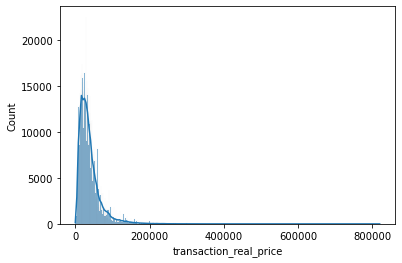

In [21]:
sns.histplot(train['transaction_real_price'], kde=True)
plt.show()

아파트 실거래가의 분포가 왼쪽으로 치우쳐져 있습니다.

그렇다면 로그변환을 해서 아파트 실거래가의 분포를 종모양의 <font color=red>정규분포</font>를 이루도록 하는 게 좋습니다 🙂

**로그변환을 하는 이유**는 다음과 같습니다.

* 큰 수에 로그를 취하면 이상값의 영향이 작아집니다.
* 복잡한 계산을 쉽게 만들어 줍니다.

다만, 로그변환이 만능의 방법이 아닙니다! 로그변환을 적용한다고 해서 무조건 좋은 건 아니에요 😥<br>
그 이유는 다음과 같습니다.

* 원본 데이터가 음수라면 로그 변환이 불가능합니다.
* 상대적 비율이 아닌 절대적인 값이 중요할 경우 변환시 해석을 왜곡할 가능성이 있습니다.
* 데이터가 0인 경우 일반적인 로그 변환이 불가능합니다.

이러한 경우에는 로그변환을 사용할 수 없거나 사용한다고 해도 오히려 좋지 않은 결과를 도출할 수 있습니다.



다만 마지막에 언급했던 0 값을 가지는 데이터에 로그변환을 하려면, 일반적인 $log(x)$가 아닌 $log(1+x)$를 사용하게 되는데요. <br>
이를 쉽게 구현하기 위해서 numpy는 <font color=blue>np.log1p()</font>함수를 제공합니다. 

그렇다면 `np.log1p()`을 사용해서 로그변환을 적용하겠습니다 😄

여기서 주의할 점 한 가지!<br> 
로그변환을 했다면 나중에 예측값은 <font color=green>e(자연상수)</font>로 변환해주어야 한다는 것을 잊지마세요!

In [22]:
train['transaction_real_price'] = np.log1p(train['transaction_real_price'])

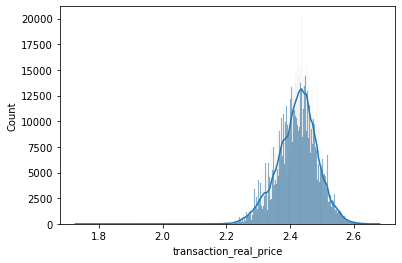

In [23]:
sns.histplot(np.log1p(train['transaction_real_price']), kde=True)
plt.show()

어느 정도 종 모양을 이루는 게 보이네요!

---

### 이상치

다음으로 이상치에 대해 알아보겠습니다 🙂 

너무 심각한 이상치는 모델링에 있어서 편향을 발생시킬 수 있습니다. <br>
그렇기 때문에 이러한 이상치는 제거해주는 것이 좋아요!

**이상치 제거**에는 특히 도메인 지식이 많이 필요한데요 😮😮 <br>
여러분은 혹시 평단가가 무엇인지 알고 있으신가요?

평단가란 1평당 가격을 의미하는데요. 1평은 약 3.3㎡입니다.<br> 
그래서 이전에 평단가 컬럼을 만들 때 매매가를 전용면적으로 나누고 3.3을 곱했던 것입니다 😃 (아하, 그런 깊은 뜻이 있었다니!)

따라서 보통 아파트 가격을 물을 때는 <font color=green>'그래서 평당 얼마야?'</font> 라는 말을 많이 합니다.

그렇다면 우리나라 아파트의 평단가는 얼마 정도 될까요?

kb 부동산에서 낸 통계 자료를 살펴보겠습니다.

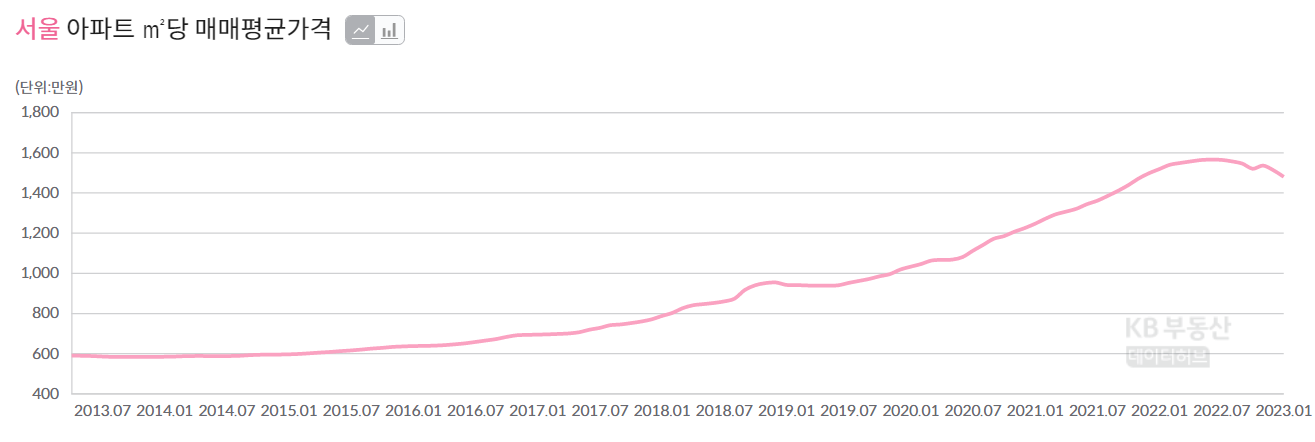

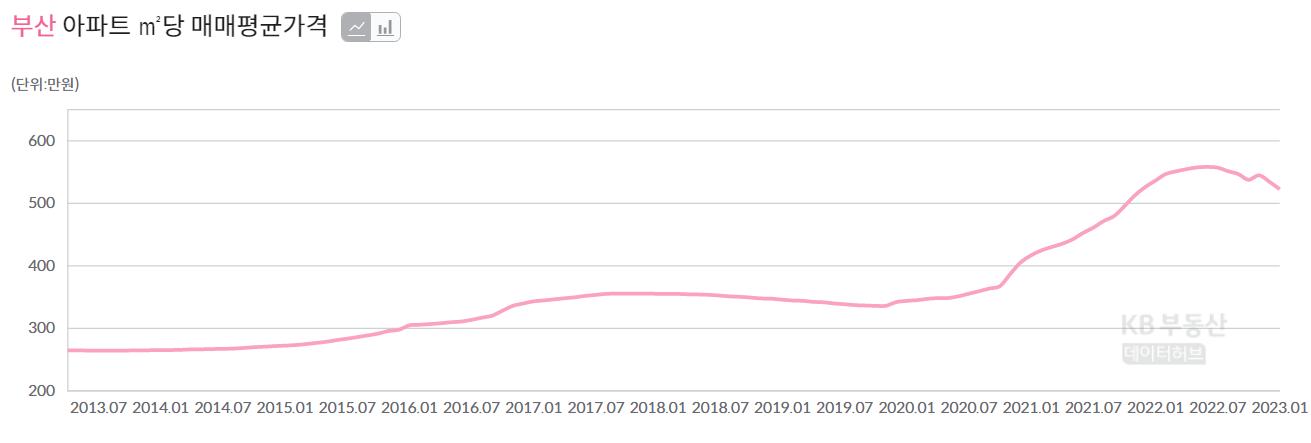

>출처 : https://data.kbland.kr/kbstats/wmh?tIdx=HT07&tsIdx=aptM2SaleAvgPrice

해당 그래프는 kb부동산에서 제공한 서울과 부산의 면적당 아파트 매매가를 나타냅니다. <br>
서울,부산 모두 면적당 매매가가 최소 200보다는 크네요!

그렇다면 우리가 구하고 싶은 평단가는 어떻게 구할까요? 🤔

네! 맞습니다 (짝짝) 👏👏

지금 보이는 y축 값에 <font color=green>3.3</font>을 곱하면 됩니다.<br>
3.3을 곱한 수치인 평단가가 200이라는 것은 시간의 흐름을 고려했을 때도 너무 작은 수치죠?

따라서 평단가 200을 기준으로, 200보다 작은 아파트 가격은 이상치로 간주하고 제거하겠습니다. <br>
여기에서도 loc가 사용해볼게요. (부라보, 멋지다 loc.😀)

In [24]:
train  = train.loc[train['price_per_area']>= 200, :]

다음으로, 모델링을 할 때 범주형 컬럼을 어떻게 처리해야 하는지 알아보겠습니다.

---

### 복잡한 컬럼 삭제

다음으로 컬럼 삭제에 대해 알아보겠습니다.

컬럼을 많이 집어넣는다고 해서 무조건 예측이 잘 되는 것은 아닙니다 !

아파트 거래가에 큰 영향을 주지 않는 컬럼은 오히려 분석에 도움이 되지 않을 수도 있어요 😥


따라서 분석을 진행하면서, 예측에 필요하지 않을 것으로 판단되는 컬럼들은 제거해주는 것이 좋은데요. 

아래 5개의 컬럼은 전처리하기 어렵거나 아파트 실거래가 예측에 큰 도움이 될 것 같지 않아요 😮 

따라서 과감하게 제거해줍시다 😎

- transaction_id: 아파트 실거래 아이디
- apartment_id: 아파트 아이디
- dong: 아파트 법정동
- jibun: 아파트 지번
- addr_kr: 아파트 주소



In [25]:
train = train.drop(['transaction_id','apartment_id','dong','jibun','addr_kr'],axis=1)

또한, 우리가 데이터 전처리 과정에서 생성한 컬럼도 있었죠?


* transaction_month : 거래 년월 컬럼을 사용해서 거래년도(year), 거래월(month)를 생성했습니다.

* year, month, year_of_completion : 완공날짜, 거래년도를 이용해서 아파트 나이(age) 변수를 생성했습니다.

* branded : 아파트명을 라벨인코딩할 때, 아파트명 브랜드 인코딩 여부(branded) 변수를 생성했습니다.
<br>

따라서 transaction_year_month, year, month, year_of_completion, branded 컬럼도 분석에서 제외시키겠습니다.

또한 price_per_area는 train데이터에만 있는 변수이므로 삭제하겠습니다.

In [26]:
train = train.drop(['transaction_year_month', 'year', 'month', 'year_of_completion', 'branded', 'price_per_area'],axis=1)

---

## 3.4 범주형 데이터 처리하기

범주형 데이터는 문자로 구성되어 있기 때문에 일반적으로 모델이 인식하지 못합니다. <br>
따라서 범주형 데이터를 숫자화하는 과정이 필요한데요!

범주형 데이터를 처리하는 대표적인 방법에는 아래와 같은 2가지 방법이 있습니다.



* <font color=orange>**OnehotEncoding**</font>
* <font color=orange>**LabelEncoding**</font>

### 원-핫 인코딩(OnehotEncoding)

먼저 원-핫 인코딩에 대해 알아보겠습니다.

<font color=red>**원-핫인코딩(OnehotEncoding)**</font>이란 그 범주에 해당하는 값은 <font color=blue>1</font>, 나머지 컬럼에는 <font color=blue>0</font>을 할당하는 방식인데요.

원리를 설명하기 위해 문자형 변수중에 `'transaction_date'`를 예시로 들어봅시다.



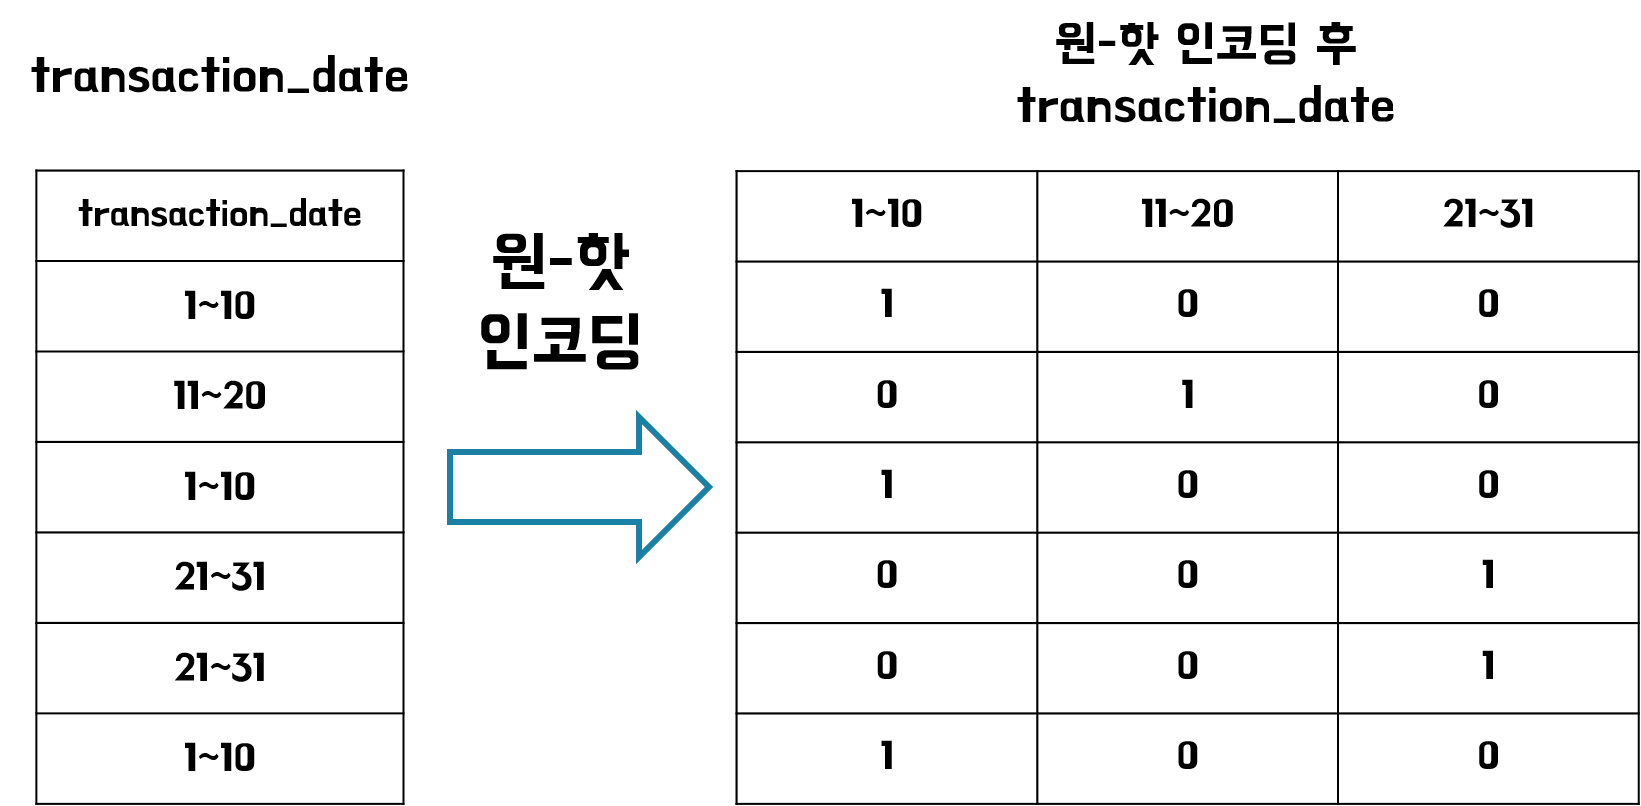

위에서 보이는 것 처럼 `transaction_date`의 각각의 변수값이 컬럼명이 된 게 보이시나요? <br>
이후 해당 변수값이 있는 곳은 1, 없는 곳은 0으로 지정하는 방법이 원-핫 인코딩 방법입니다.<br>



즉, 원-핫 인코딩 방법을 사용하게 되면 해당 범주형 변수의 변수값의 개수 만큼 새로운 컬럼이 생성됩니다.

원-핫 인코딩을 적용하는 방법은 sklearn 패키지의 <font color=green>**OneHotEncoder**</font>와 pandas 패키지의 <font color=green>**get_dummies**</font>가 있습니다 !

여기서는 <font color=blue>pd.get_dummies()</font>로 실습해보도록 하겠습니다.

이를 위해 먼저 범주형 변수인 `'city'`,`'transaction_date'`, `'reconstruction'`을 따로 모아 <br>
train_X_cat 이라는 데이터프레임을 만든 후 실습을 진행하겠습니다.

In [27]:
train_X_cat = train[['city','transaction_date', 'reconstruction']]

pd.get_dummies()를 사용하기 위해서는 pd.get_dummies()안에 변환하려는 데이터 프레임을 넣으면 되는데요. <br>
우리는 train_X_cat 데이터 프레임을 넣어보겠습니다.

In [28]:
pd.get_dummies(train_X_cat)

,city_부산광역시,city_서울특별시,transaction_date_11~20,transaction_date_1~10,transaction_date_21~31,reconstruction_NO,reconstruction_YES
0,0,1,0,0,1,1,0
1,0,1,0,1,0,0,1
2,0,1,0,1,0,1,0
3,0,1,1,0,0,1,0
4,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...
1216548,1,0,1,0,0,1,0
1216549,1,0,0,0,1,1,0
1216550,1,0,0,0,1,1,0
1216551,1,0,0,0,1,1,0


<font color=green>칼럼명_변수값</font>이라는 변수들이 새로 생겨나고 각각 0 혹은 1이 기입되어 있는 게 보이시나요? <br>
이제 모두 숫자가 되었으니 모델이 잘 인식하겠죠?

🍯 여기서 꿀팁 들어갑니다! 🍯<br> 

여러 데이터들 중에서 특정 컬럼에만 원-핫 인코딩을 적용하려면 어떻게 해야 할까요? 

이를 위해 `columns`라는 키워드가 존재합니다. <br>
train_X_cat 데이터에서 `'city'` 칼럼만 숫자로 변형시켜보겠습니다.

In [29]:
pd.get_dummies(train_X_cat, columns = ['city'])

,transaction_date,reconstruction,city_부산광역시,city_서울특별시
0,21~31,NO,0,1
1,1~10,YES,0,1
2,1~10,NO,0,1
3,11~20,NO,0,1
4,21~31,NO,0,1
...,...,...,...,...
1216548,11~20,NO,1,0
1216549,21~31,NO,1,0
1216550,21~31,NO,1,0
1216551,21~31,NO,1,0


`'city'`변수만 숫자로 잘 바뀌었네요! 이제 원하는 변수만 착착 바꿀 수 있겠죠? 👌



하지만 모든 범주값에 대해 컬럼을 새로 생성하기 때문에, 범주가 매우 많이 생겨날 경우에 원-핫 인코딩은 그리 좋은 방법이 아닙니다. <br>
컬럼이 많아지면 모델이 데이터를 받아들이기 힘들어지기 때문이죠 😥


(마치 너무 많은 양의 음식을 먹게 되면 나중에 소화하기 힘든 것처럼요! 🍕🍔🍟🌭) <br>



이럴 때를 위해서 라벨인코딩이라는 기법이 존재합니다 😎

다음 파트에서 라벨인코딩에 대해 알아볼게요!

---

### 라벨인코딩(LabelEncoding)

라벨인코딩의 원리를 설명하기 위해, 문자형 변수중에 `'transaction_date'`를 예시로 들어보겠습니다.

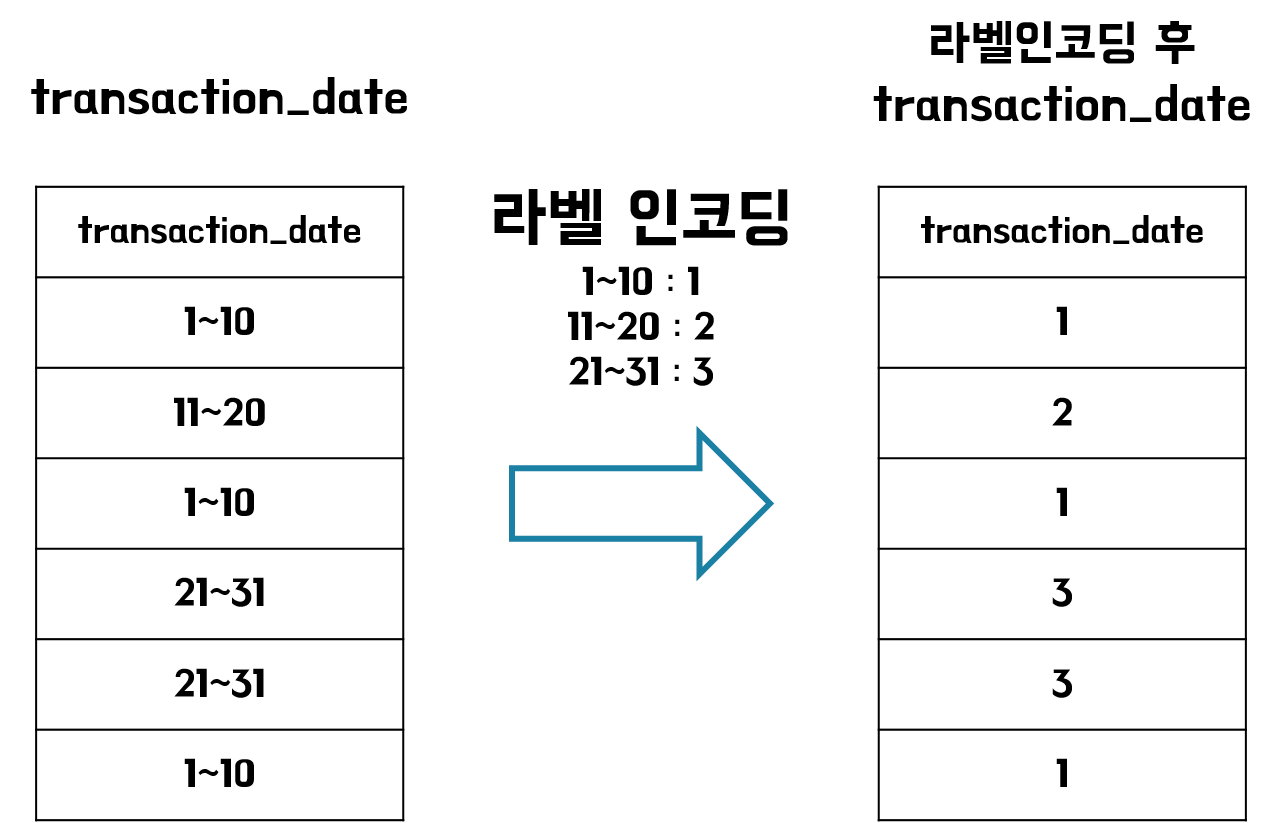

네? 사진만 봐도 이해 되신다구요? 👏👏👏 <br>


<font color=red>**라벨인코딩(LabelEncoding)**</font>은 범주형 변수의 각각의 범주값을 숫자로 일대일 매칭시키는 방법입니다. <br>
이를 사용하면 모델이 인식할 수 있는 숫자로 변환될 뿐만 아니라 칼럼도 추가로 생성하지 않겠죠? 

라벨인코딩은 sklearn.preprocessing 에서 <font color=orange>**LabelEncoder**</font>를 통해 구현할 수 있는데요. <br>
먼저 `city `컬럼에 LabelEncoder를 적용해보면서 그 원리를 알아보겠습니다.

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
le = LabelEncoder()
le.fit_transform(train_X_cat.loc[:,'city'])

array([1, 1, 1, ..., 0, 0, 0])

city 컬럼의 값들이 숫자로 바뀐 게 보이시나요? 😆 <br>


이처럼 LabelEncoder를 사용하기 위해서는 LabelEncoder를 먼저 불러온 후(약어로 le), <br>
<font color=green>**le.fit_transform()**</font>의 괄호 안에 변환하고 싶은 변수를 `데이터 프레임` 혹은 `Series` 형태로 넣어서 적용할 수 있습니다.

이제 범주형 칼럼을 모아 놓은 train_X_cat에 LabelEncoder를 적용해보겠습니다. <br>
변형된 컬럼을 재지정하면 데이터 프레임에 LabelEncoder가 적용됩니다.

In [32]:
le = LabelEncoder()
train_X_cat.loc[:,'city'] = le.fit_transform(train_X_cat.loc[:,'city'])
train_X_cat.loc[:,'transaction_date'] = le.fit_transform(train_X_cat.loc[:,'transaction_date'])
train_X_cat.loc[:,'reconstruction'] = le.fit_transform(train_X_cat.loc[:,'reconstruction'])

C:\Users\USER\AppData\Local\Temp\ipykernel_2000\3988544709.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_X_cat.loc[:,'city'] = le.fit_transform(train_X_cat.loc[:,'city'])
C:\Users\USER\AppData\Local\Temp\ipykernel_2000\3988544709.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_X_cat.loc[:,'transaction_date'] = le.fit_transform(train_X_cat.loc[:,'transaction_date'])
C:\Users\USER\AppData\Local\Temp\ipykernel_2000\3988544709.py:4: SettingWithCopyWarning: 
A value is trying to be set on a

In [33]:
train_X_cat.head()

,city,transaction_date,reconstruction
0,1,2,0
1,1,1,1
2,1,1,0
3,1,0,0
4,1,2,0


`'city'`, `'transaction_date'`, `'reconstruction'` 모든 컬럼이 숫자형으로 바뀐 게 보이시나요?

이제 모델이 범주형 컬럼을 잘 이해할 수 있겠네요!

범주형 변수에 대한 처리가 끝났으니, 다음으로 수치형 데이터 처리에 대해 알아보겠습니다.

---

## 3.5 수치형 데이터 처리하기 (데이터 스케일링)

**<font color=red>데이터 스케일링(Data Scaling)</font>** 이란 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업을 뜻합니다. <br>



`scikit-learn` 패키지에서는 스케일링을 수행하기 위한 다양한 스케일러를 제공하는데요. 이때 모든 스케일러는 공통적으로 다음과 같은 메서드를 이용해요. 


* `fit()`: 데이터 변환을 위한 기준 정보를 적용
* `transform()`: fit()을 통해 설정된 정보를 이용해 실제로 데이터를 변환 <br>



그리고 `fit_transform()`은 위 두 가지 메서드를 한 번에 적용해주는 기능을 수행합니다. 

그런데, 이 메서드들을 사용할 때 <font color=red>주의해야 할 점</font>이 있어요 😫😫 <br>




train 데이터에 fit()과 transform()을 적용하면, test 데이터로는 다시 fit()을 수행하지 않고 transform() 변환만 적용해야 한답니다. <br>
이렇게 하지 않으면 train과 test 데이터의 스케일링 기준 정보가 서로 달라지기 때문에 올바른 예측 결과를 도출하지 못할 수도 있어요 😥

정리하자면, 우리는 <font color=green>train 데이터에는 fit_transform()을 적용</font>해주고 <font color=green>test 데이터에는 transform()만 적용</font>해주어야 해요. <br>
이해되셨다면 시작해볼까요?

아, 참! 스케일링은 값을 조정하는 과정이기 때문에 <font color=blue>수치형 변수에만 적용</font>해야 한다는 거 잊지 말아요 😘 <br>
그러니 우선 train 데이터에서 수치형 컬럼을 따로 추출해서 train_X_num이라는 객체에 저장해봅시다. 

In [34]:
# train 데이터의 수치형 컬럼을 추출해서 train_X_num이라는 객체에 저장합니다.
train_X_num = train[['exclusive_use_area','floor', 'age']]

스케일링 방법으로는 주로 표준화(Standardization)와 정규화(Normalization)를 사용합니다. <br>
먼저 표준화부터 함께 살펴볼까요? 😊

---



### 표준화(Standardization)

<font color=red>**표준화**(Standardization)</font>는 변수 각각의 평균을 0, 분산을 1로 만들어주는 스케일링 기법입니다. <br>
표준화가 적용된 변수는 가우시안 정규분포를 가진 값으로 변환됩니다.

아래 수식과 같이, 변수 x의 원래 값에서 x의 평균을 뺀 값을 x의 표준편차로 나눈 값으로 계산할 수 있어요.

$$z = \frac{x_i-mean(x)}{stdev(x)}$$

표준화를 위해, `scikit-learn` 패키지에서는 <font color=orange>**StandardScaler**</font>를 제공하는데요. <br>
이걸 사용해서 표준화를 진행해보겠습니다 😀

In [35]:
# scikit-learn 패키지의 StandardScaler 클래스를 불러옵니다.
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체를 생성합니다.
standard_scaler = StandardScaler()

In [36]:
# fit_transform()을 사용해서 학습과 스케일링을 한 번에 적용합니다.
train_standard = standard_scaler.fit_transform(train_X_num)

# 표준화가 완료된 데이터를 데이터프레임 형태로 변환합니다.
train_standard = pd.DataFrame(train_standard, index=train_X_num.index, columns=train_X_num.columns)

In [37]:
# 표준화가 잘 되었는지 데이터를 확인해봅시다.
train_standard.head()

,exclusive_use_area,floor,age
0,0.227820,-1.111972,-0.943903
1,0.720152,-0.506523,2.234057
2,0.225076,-0.506523,-1.491827
3,2.340216,0.855739,-1.053488
4,3.988413,-0.960610,-1.163072


와우! 수치형 데이터에 대한 표준화가 잘 적용되었네요 😎

---

### 정규화(Normalization)

<font color=red>**정규화(Normalization)**</font>는 일반적으로 서로 다른 변수의 크기를 통일하기 위해 크기를 변환해주는 개념입니다. <br>
이렇게 설명하면 너무 어렵죠? 😥



예를 들어 아래와 같이 두 변수가 있다고 가정해볼게요. 
* 변수 A: 거리를 나타내는 변수로서 값이 0 ~ 200KM로 주어짐 
* 변수 B: 금액을 나타내는 변수로서 값이 0~200,000,000원으로 주어짐



정규화란 이 변수들을 모두 동일한 크기 단위로 비교하기 위해, 값을 모두 0에서 1 사이로 변환하는 것입니다 😊 <br>
이렇게 변수들이 평등하게 0~1 사이에 놓여져 있으면, 모델은 어느 특정 변수에 중점을 두기보다는 변수들을 평등하게 바라보고 학습을 진행하게 됩니다! ⚖️

아래 수식과 같이, 변수 x의 원래 값에서 x의 최솟값을 뺀 값을 x의 최댓값과 최솟값의 차이로 나눈 값으로 계산할 수 있어요.

$$\frac{x_i-min(x)}{max(x)-min(x)}$$

`scikit-learn` 패키지의 <font color=orange>**MinMaxScaler**</font>는 데이터 값을 0과 1 사이로 변환해줍니다. 



MinMaxScaler는 분류 문제보다 아파트 실거래가 예측과 같은 회귀 문제를 해결할 때 더 적합한 스케일링 기법이에요. <br>
만약 이상치가 존재할 경우, 이걸 적용하면 데이터가 매우 좁은 범위로 압축될 수 있겠죠? 😮 <br>

In [38]:
# scikit-learn 패키지의 MinMaxScaler 클래스를 불러옵니다.
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체를 생성합니다.
minmax_scaler = MinMaxScaler()

In [39]:
# fit_transform()을 사용해서 학습과 스케일링을 한 번에 적용합니다.
train_minmax = minmax_scaler.fit_transform(train_X_num)

# Min-Max 스케일링이 완료된 데이터를 데이터프레임 형태로 변환합니다.
train_minmax = pd.DataFrame(train_minmax, index=train_X_num.index, columns=train_X_num.columns)

In [40]:
# 스케일링이 잘 되었는지 데이터를 확인해봅시다.
train_minmax.head()

,exclusive_use_area,floor,age
0,0.182046,0.071429,0.125000
1,0.216619,0.119048,0.642857
2,0.181853,0.119048,0.035714
3,0.330386,0.226190,0.107143
4,0.446128,0.083333,0.089286


짜잔! 모든 수치형 변수의 값이 0~1 사이로 변환되었어요 😄

잠깐, 여기 주목해주세요! 📢📢📢

minmax는 데이터 고유의 성질을 잃어버릴 수도 있기 때문에 <br>
적용했을 때와 적용하지 않았을 때를 비교한 후 사용 여부를 결정해야 한다는 점, 잊지 마세요!

---

### 로버스트(Robust)

표준화, 정규화 이외에도 로버스트 스케일링이라는 기법이 존재하는데요 😊 <br>

<font color=red>**로버스트(Robust)**</font>는 데이터의 중앙값 = 0, IQR = 1이 되도록 스케일링하는 기법입니다. <br>


RobustScaler를 사용하면 모든 변수들이 같은 스케일을 갖게 되며, StandardScaler에 비해 스케일링 결과가 더 넓은 범위로 분포하게 돼요. <br>


따라서 StandardScaler에 비해 이상치의 영향이 적어진다는 장점이 있습니다!



아래 수식과 같이, 변수 x의 원래 값에서 x의 중앙값을 뺀 값을 x의 제3사분위수(Q3)와 제1사분위수(Q1)의 차이를 나눈 값으로 계산할 수 있어요.

$$\frac{x_i-median(x)}{Q3-Q1}$$

In [41]:
# scikit-learn 패키지의 RobustScaler 클래스를 불러옵니다.
from sklearn.preprocessing import RobustScaler

# RobustScaler 객체를 생성합니다.
robustScaler = RobustScaler()

In [42]:
# fit_transform()을 사용해서 학습과 스케일링을 한 번에 적용합니다.
X_train_robust = robustScaler.fit_transform(train_X_num)

# robust 스케일링이 완료된 데이터를 데이터프레임 형태로 변환합니다.
train_robust = pd.DataFrame(X_train_robust, index=train_X_num.index, columns=train_X_num.columns)

---

### 데이터 스케일링 적용

그렇다면 정규화와 표준화를 꼭 적용해야 할까요? 어떤 경우에 적용해야 할까요?

**데이터 스케일링에는 정답이 없어요.** 모델링 관점에서, 성능이 더 잘 나오는 것으로 선택하면 된답니다 😊

그럼 이번 대회에서는 <font color=red>정규화</font>를 진행해볼게요 😃 <br>


아까 수치형 컬럼에 MinMaxScaler를 적용한 후 데이터프레임 형태로 만든 것을 train_minmax이라는 객체에 저장했어요. <br>
그럼 MinMaxScaler를 적용한 수치형 데이터와 그렇지 않은 문자형 데이터(아파트 브랜드 컬럼)를 다시 합쳐줘야겠죠?

두 데이터프레임을 물리적으로 합칠 때는 **Pandas** 패키지의 **<font color=orange>concat()</font>** 함수를 이용하면 된답니다. <br>
이때, 열 방향(좌우)으로 합쳐주기 위해 `axis=1`이라는 옵션을 적어줄게요!
* `pd.concat([데이터프레임1, 데이터프레임2] , ... , axis=1)`

In [43]:
# 두 데이터프레임을 열 방향(axis=1)으로 합쳐줍니다.
X = pd.concat([train_minmax, train_X_cat, train['apt']], axis=1)

그리고 나중에 아파트 실거래가를 예측을 하기 위해, 
아파트 실거래가를 의미하는 'transaction_real_price' 변수를 y라는 객체에 미리 저장해둡시다 😉

In [44]:
# 예측해야 할 변수를 y라는 객체에 따로 저장합니다.
y = train['transaction_real_price']

---

# 4. 전처리 결과 test 데이터에 적용하기

우리가 잊고 있던 데이터가 있었죠 ?
바로 **<font color=blue>test</font>** 데이터입니다.



train 데이터가 학습데이터라고 했죠?


test 데이터는 학습이 잘 되었는지 확인하는 데이터입니다.



train 데이터로 시험공부를 하고 test 데이터로 <font color=green>**모의고사**</font>를 본다고 생각하면 돼요.




모의고사 점수를 통해 내가 시험공부를 잘 했는지 확인하고 내가 부족한 부분을 다시 복습할 수 있는 것처럼 <br>
test 데이터의 예측 결과를 통해 모델이 예측을 잘 하고 있는지 성능을 평가할 수 있답니다.


그래서 train 데이터에서 한 전처리 결과를 반드시 test 데이터에도 적용해줘야 한답니다.




test 데이터를 불러온 후 test 데이터에도 전처리를 적용해봅시다.

Stage 2에서 train 데이터의 **transaction_year_month**와 **transaction_date** 컬럼을 가공했던 거 기억하시나요?

이 컬럼도 포함해서 test 데이터에도 전처리를 진행해봅시다 !

In [45]:
# test 데이터를 불러옵시다
test = pd.read_csv('./test.csv')

---

## 4.1 파생변수 생성

- transaction_year_month에서 연도와 월을 분리

In [46]:
test['year'] = test['transaction_year_month'].astype(str).str[:4].astype(int)
test['month'] = test['transaction_year_month'].astype(str).str[4:].astype(int)

- transaction_date에서 월초, 월중, 월말의 세 구간으로 나누기

In [47]:
test.loc[(test['transaction_date'] == '21~30') | (test['transaction_date'] == '21~28') | (test['transaction_date'] == '21~29'), 'transaction_date'] = '21~31'

- 아파트 연식

In [48]:
test['age'] = test['year'] - test['year_of_completion']

- 아파트 브랜드

In [49]:
# re 모듈을 선언하고 괄호와 괄호 안 문자를 찾아서 삭제합니다.
import re

regex = "\(.*\)"

for i in tqdm(range(len(test))):
   test.at[i, 'apt'] = re.sub(regex, '', test.at[i, 'apt']) 

100%|███████████████████████████████████████████████████████████████████████████| 5463/5463 [00:00<00:00, 29932.78it/s]


In [50]:
# 상위 20개 아파트 이름에 속하는지를 구별하는 변수를 생성합니다.
test['branded'] = False

# 아파트 이름이 리스트 안의 브랜드를 가지고 있다면 대표 이름으로 바꿔고 branded 변수를 True로 바꿉니다.
for brand in tqdm(apt_brand_list):
  test['apt'].loc[test['apt'].str.contains(brand)] = brand
  test['branded'].loc[test['apt'].str.contains(brand)] = True

# branded 변수가 False인 아파트를 others라는 이름으로 통합합니다.
test['apt'].loc[~test['branded']] = 'others'

  0%|                                                                                           | 0/20 [00:00<?, ?it/s]C:\Users\USER\AppData\Local\Temp\ipykernel_2000\1542235063.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['apt'].loc[test['apt'].str.contains(brand)] = brand
C:\Users\USER\AppData\Local\Temp\ipykernel_2000\1542235063.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['branded'].loc[test['apt'].str.contains(brand)] = True
100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 19.24it/s]
C:\Users\USER\AppData\Local\Temp\ipykernel_2000\

In [51]:
# 평단가 평균이 낮은 순으로 아파트명에 0부터 19까지 부여해줍니다.
for i, apt in enumerate(tqdm(apt_price.index)):
    test['apt'].loc[test['apt'] == apt] = i

  0%|                                                                                           | 0/20 [00:00<?, ?it/s]C:\Users\USER\AppData\Local\Temp\ipykernel_2000\2031012239.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['apt'].loc[test['apt'] == apt] = i
100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 34.40it/s]


In [52]:
# object 타입이기 때문에 이를 int64 형태로 변경합니다.
test.loc[:,'apt'] = test.loc[:,'apt'].astype('int')

---

### 퀴즈

In [ ]:
# test 데이터에서 reconstruction 컬럼을 생성해보세요 !


#### 설명

loc을 이용해서 아파트 나이가 20년 이상인 아파트를 재건축 대상이라고 가정하고

재건축 대상인 경우 1, 재건축 대상이 아닌 경우 0인 범주형 변수 **reconstruction**를 만들어 봅시다 !

#### 풀이 - 힌트

`데이터프레임.loc[조건] = 값`은 자주 사용했으니, 데이커 여러분들이 잘 기억하고 있으실 것 같아요 🙂 

앞서 train 데이터에서도 loc를 이용해서 reconstruction 변수를 만들었는데, test 데이터에 대해서도 똑같이 해볼까요?

#### 풀이 - 정답

```
test.loc[train['age'] < 20, 'reconstruction'] = 'NO'
test.loc[train['age'] >= 20, 'reconstruction'] = 'YES'
```

---

## 4.2 복잡한 컬럼 삭제

In [53]:
test = test.drop(['transaction_id','apartment_id','dong','jibun', 'addr_kr'],axis=1)

In [54]:
test = test.drop(['transaction_year_month', 'year', 'month', 'branded', 'year_of_completion'],axis=1)

---

## 4.3 수치형데이터, 범주형데이터 분리

In [57]:
test_X_num = test[['exclusive_use_area','floor', 'age']] 
test_X_cat = test[['city','transaction_date', 'reconstruction']]

---

### 라벨인코딩

In [58]:
test_X_cat.loc[:,'city'] = le.fit_transform(test_X_cat.loc[:,'city'])
test_X_cat.loc[:,'transaction_date'] = le.fit_transform(test_X_cat.loc[:,'transaction_date'])
test_X_cat.loc[:,'reconstruction'] = le.fit_transform(test_X_cat.loc[:,'reconstruction'])

C:\Users\USER\AppData\Local\Temp\ipykernel_2000\829124318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_X_cat.loc[:,'city'] = le.fit_transform(test_X_cat.loc[:,'city'])
C:\Users\USER\AppData\Local\Temp\ipykernel_2000\829124318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_X_cat.loc[:,'transaction_date'] = le.fit_transform(test_X_cat.loc[:,'transaction_date'])
C:\Users\USER\AppData\Local\Temp\ipykernel_2000\829124318.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy o

---

### 퀴즈

In [ ]:
# transform()을 사용해서 test 데이터의 스케일링을 한 번에 적용합니다.


#### 설명

위 라벨인코딩 설명에서, test 데이터로는 다시 fit()을 수행하지 않고 **<font color=red>transform()</font>** 변환만 적용해야 한다고 했던 거, 기억하시나요?

그렇다면 transform()을 사용해서 test_X_num 데이터에 정규화를 적용해보고 test_minmax라는 이름으로 지정해보세요!

#### 풀이 - 힌트

`스케일러.transform(test 데이터의 수치형변수)`

#### 풀이 - 정답

```
test_minmax = minmax_scaler.transform(test_X_num)
```

---

In [61]:
# Min-Max 스케일링이 완료된 데이터를 데이터프레임 형태로 변환합니다.
test_minmax = pd.DataFrame(test_minmax, index=test_X_num.index, columns=test_X_num.columns)

### 라벨인코딩, 정규화를 완료한 데이터 합치기

train 데이터에서는 독립변수인 X, 종속변수인 y로 나눴죠?

test 데이터는 독립변수밖에 없기 때문에 X와 y를 따로 나누지 않고 `test`로 지정합시다 !

In [62]:
# 두 데이터프레임을 열 방향(axis=1)으로 합쳐줍니다.
test = pd.concat([test_minmax, test_X_cat,test['apt']], axis=1)

---

# 5. 모델링

이제 train 데이터로 학습을 한 후 예측을 해볼건데요. 모델링이 처음이니 가장 기본이 되는 <font color=red>선형회귀(Linear Regression)</font>로 예측을 해볼 거에요.

## 선형회귀(Linear Regression)


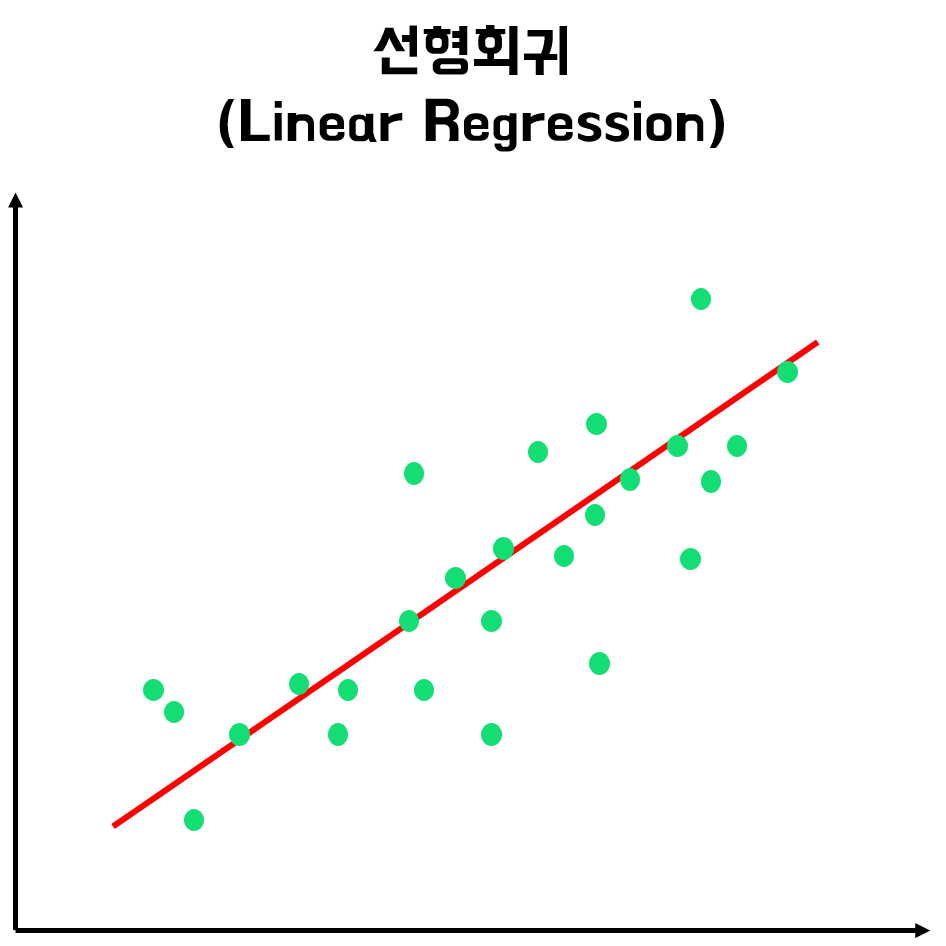

<font color=red>**선형 회귀(Linear Regression)**</font>란 <font color=blue>예측하고자 하는 종속 변수 y와 독립 변수 x의 관계</font>를 가장 잘 나타내는 직선을 구하는 회귀분석 방법입니다.






위 그래프에서 빨간색 선은 연두색 점들이 보여주는 x와 y의 관계를 잘 나타내고 있습니다.



우리는 이처럼 선형 회귀 분석을 통해 x 값이 증가할수록 y 값도 증가한다는 상관 관계를 확인할 수 있으며, <br>
새로운 x 값이 등장했을 때에도 그 x 값에 해당하는 y 값이 어디 쯤에 위치할지 어느정도 예측할 수 있게 됩니다.

여기서 종속 변수(y)란 우리가 궁극적으로 알기 원하는 값을 의미합니다. 우리 대회에서의 y는 아파트 실거래가가 되겠죠?! <br>
독립변수(x)란 종속 변수에 영향을 줄 것이라 **예측**되는 컬럼들을 의미합니다. 

여기서 예측이라고 쓴 이유는 종속 변수를 제외한 모든 컬럼을 넣는것이 아니라 <font color=green>종속 변수에 영향을 줄 수 있는 변수</font>들만 넣어야 하기 때문입니다. <br>
따라서 정답이 있는 것이 아닙니다.

---

sklearn 패키지를 이용해 간단하게 실습해보도록 하겠습니다.

선형회귀 패키지는 <font color=orange>from sklearn.linear_model import LinearRegression</font>으로 불러올 수 있습니다 😃

다음으로 모델 학습의 절차를 말씀 드리겠습니다.





1. LinearRegression을 불러 옵니다.

2.  `모델.fit(독립변수 X, 종속 변수 y)`을 통해 우리가 지닌 데이터를 넣으면 모델이 우리가 제공한 데이터를 학습하게 됩니다. 




이후 학습이 끝난 모델에 새로운 독립변수 값을 넣어 종속변수인 아파트 실거래가를 예측하게 됩니다.

In [63]:
from sklearn.linear_model import LinearRegression

아까 train 데이터에서 독립변수(X)와 종속변수(y)를 나눴던 거 기억하시나요?

<font color=orange>**모델.fit**</font>을 이용해 선형회귀에 데이터를 적합시킵니다.<br>
여기서는 선형회귀를 lr으로 지정했으니, <font color=orange>**lr.fit(독립변수, 종속변수)**</font>로 모델을 구축해봅시다!

In [64]:
lr = LinearRegression()
model_lr = lr.fit(X, y)

이제 우리가 만든 모델을 통해 아파트 거래가를 예측하겠습니다! 예측에 사용될 독립변수들은 test 데이터에 존재합니다 😀




<font color=orange>**구축한모델.predict(예측할데이터)**</font>를 이용해 아파트 실거래가를 예측해봅시다 !

In [65]:
# 예측값을 lr_pred로 지정합니다.
lr_pred = model_lr.predict(test)

---

여기서 조금 더 나아가, train 데이터로 학습한 모델의 구성을 한번 보도록 하겠습니다. <br>
선형회귀 모델에는 `coef_` 와 `intercept_` 라는 속성이 존재합니다.



* **학습한모델.coef_**   : 학습이 완료된 모델의 독립변수들 각각의 계수를 의미합니다. 쉽게 말해 각각의 독립 변수가 1단위씩 증가하면 종속변수에 얼만큼의 영향을 끼칠지를 나타냅니다


* **학습한모델.intercept_** : 독립변수가 모두 0일때 종속변수의 값, 즉 y절편의 값을 뜻합니다.

자, 이제 해당 속성들을 통해 학습이 끝난 모델을 살펴보겠습니다.

In [66]:
# 독립변수의 계수를 확인해봅시다
np.round(model_lr.coef_,1)

array([ 5.6,  1. , -0.2,  0.9,  0. ,  0.1,  0. ])

In [67]:
# 선형회귀의 y절편을 확인해봅시다.
np.round(model_lr.intercept_)

9.0

In [68]:
X.columns

Index(['exclusive_use_area', 'floor', 'age', 'city', 'transaction_date',
       'reconstruction', 'apt'],
      dtype='object')

이번에는 해당 값의 의미를 알아보겠습니다.



아까 로그변환한 거, 잊지 않으셨지요? 😯😯

원래는 종속변수가 transaction_real_price니까 그대로 두면 되지만, 로그변환을 했기 때문에 <font color=purple>log(transaction_real_price)</font>로 생각해야 합니다 !

$$log(transaction\_real\_price) = 9 + 5.6exclusive\_use\_area + 
floor -0.2age+	0.9city+	0transaction\_date+0.1reconstruction + 0apt$$

예를 하나 들어볼까요?



아파트 층수가 1씩 증가하면 아파트 실거래가의 로그값은 1씩 증가한다고 이해하면 되겠습니다 !

여기서 한 가지 주의할 점!! ⚠️⚠️ 

선형회귀에서 이렇게 변수들 사이의 관계를 해석할 때는 나머지 변수들의 값은 <font color=blue>고정</font>되어 있어서 아파트 실거래가에 영향을 주지 않는다고 가정한답니다.

정말 중요하니까 모두 기억하기로 약속 🤙🤙

---

# 5. Submission 파일 제출 

Stage 1에서 Submission 파일을 제출하는 방법을 배웠죠?

이제는 모델링도 해봤으니, 예측값을 넣어서 Submission 파일을 제출해봅시다.

파일 제출 순서는 다음과 같습니다 🙂



1. Submission 파일 불러오기
2. Submission파일의 `transaction_real_price`에 예측값 넣기
3. <font color=orange>**submission.to_csv('submit.csv',index=False)**</font>을 이용해 예측값을 담은 파일을 csv파일로 내보내기

In [69]:
# submission 파일 불러오기
submission = pd.read_csv('./submission.csv')

In [70]:
# submission의 앞 5개 값을 확인합시다.
submission.head()

,transaction_id,transaction_real_price
0,1145756,0
1,1198704,0
2,1222384,0
3,1179897,0
4,1223091,0


이제 선형회귀로 test데이터를 통해 예측한 값을 `submission['transaction_real_price']`에 채워줍니다.


아까 <font color=blue>**np.log1p**</font>로 로그변환을 해주었기 때문에 <font color=blue>**np.expm1**</font>를 꼭 적용해줘야 한다는 거, 잊지 마세요!

In [71]:
submission['transaction_real_price'] = np.expm1(lr_pred)

In [72]:
# submission.head()를 통해 예측값이 잘 들어갔는지 확인합니다
submission.head()

,transaction_id,transaction_real_price
0,1145756,21149.124453
1,1198704,14035.019579
2,1222384,13897.968181
3,1179897,65090.346809
4,1223091,35421.776160


In [73]:
# submit이라는 이름으로 csv파일로 내보냅니다.
submission.to_csv('./submit.csv',index=False)

In [74]:
pd.read_csv('./submit.csv')

,transaction_id,transaction_real_price
0,1145756,21149.124453
1,1198704,14035.019579
2,1222384,13897.968181
3,1179897,65090.346809
4,1223091,35421.776160
...,...,...
5458,1174640,43174.817100
5459,1175575,43028.309515
5460,1157024,76380.618155
5461,1136863,45503.236036


---

# 6. 결론

이렇게 Stage 3 에서는 파생변수 생성과 데이터 전처리, 간단한 모델링 과정을 통해 아파트 실거래가를 예측하는 방법을 배웠습니다 !



어? 그런데 우리가 사용한 모델이 예측을 잘 한 건지는 어떻게 알 수 있나요? 😮

이건 Stage 4에서 자세하게 설명하도록 하겠습니다 😁

Stage 4에서 다시 만나요 👋👋

---